# Explore here

In [1]:
import pandas as pd


url = 'https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv'

data = pd.read_csv(url)

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
data.shape

(1338, 7)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data = data.drop_duplicates().reset_index(drop=True)

data



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


- age. Edad del beneficiario principal (numérico)
- sex. Género del beneficiario principal (categórico)
- bmi. índice de masa corporal (numérico)
- children. Número de niños/dependientes cubiertos por un seguro médico (numérico)
- smoker. ¿Es fumador? (categórico)
- region. Área residencial del beneficiario en USA: noreste, sureste, suroeste, noroeste (categórico)
- charges. Prima del seguro médico (numérico)

## Análisis de variables univariante

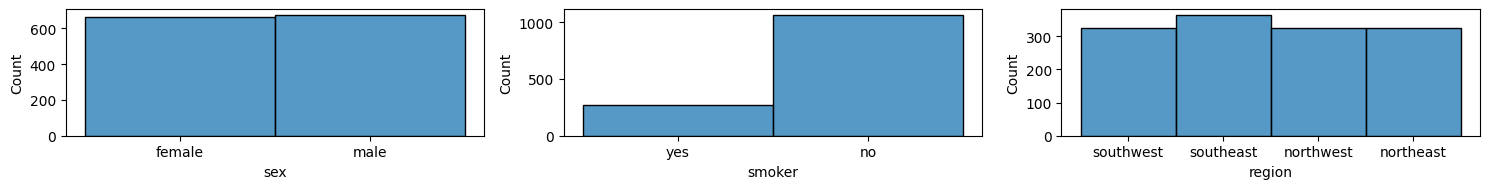

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize= (15, 2))

sns.histplot(ax = axis[0], data = data, x="sex")
sns.histplot(ax = axis[1], data = data, x="smoker")
sns.histplot(ax = axis[2], data = data, x="region")

plt.tight_layout()

plt.show()

- la cantidad de hombres y mujeres es basicamente la misma
- la cantidad de fumadores es mucho mas baja que la de no fumadores
- la mayor parte de las personas estan en la region Southeast, y las demas regiones tiene casi la misma cantidad de personas

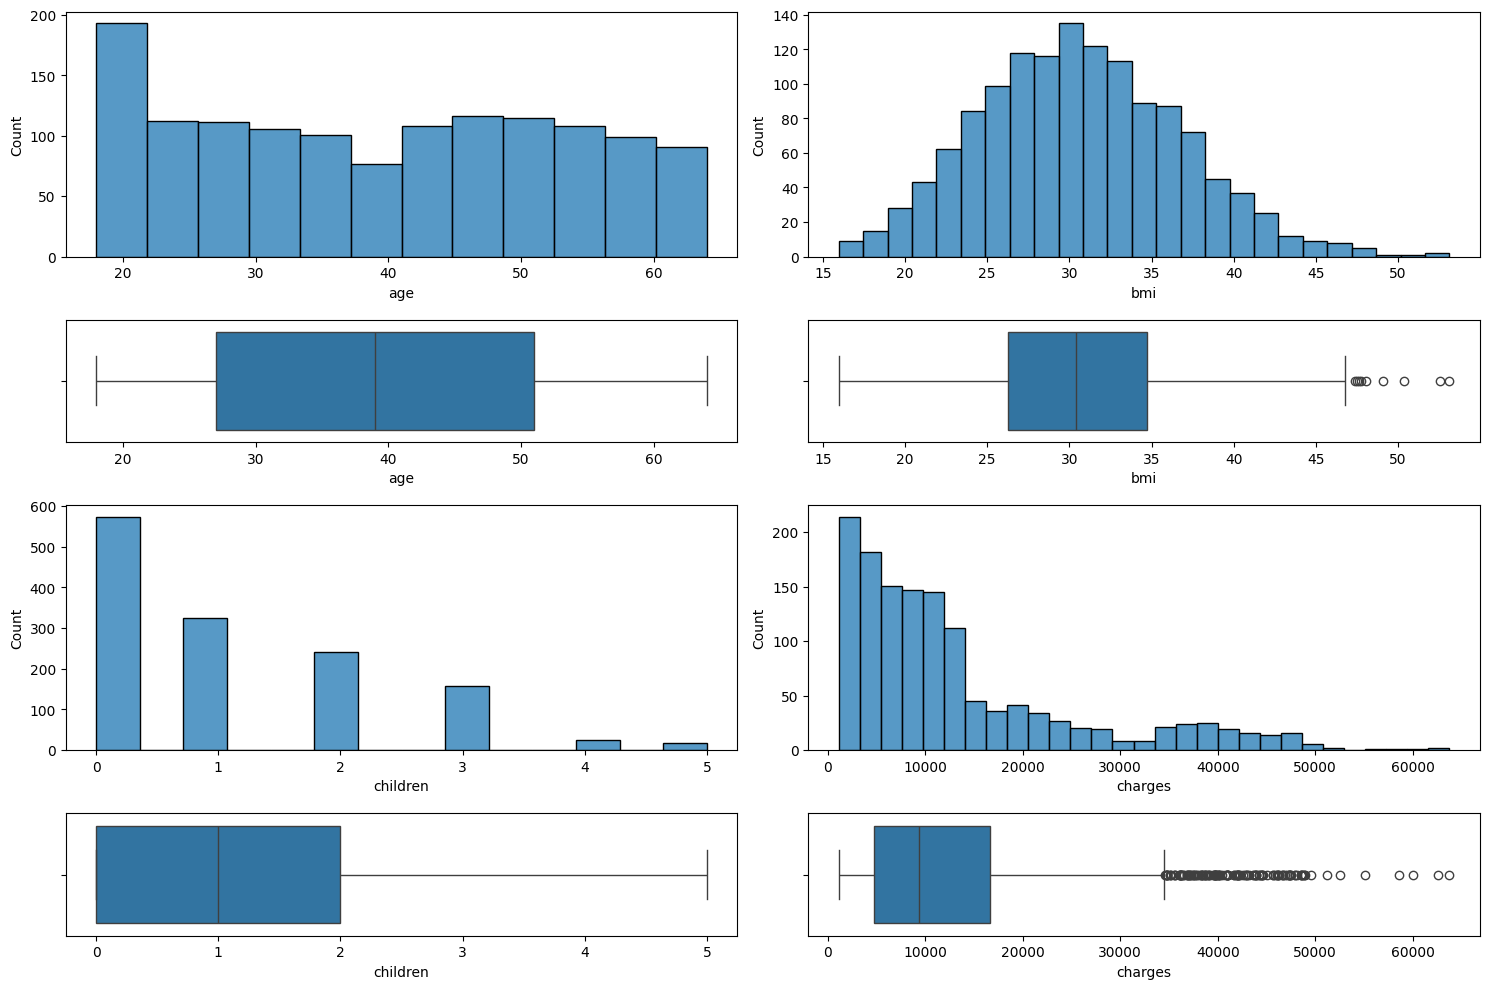

In [6]:
fig, axis = plt.subplots(4, 2, figsize=(15, 10), gridspec_kw={'height_ratios': [4,2,4,2]})


sns.histplot(ax = axis[0, 0], data = data, x = "age")
sns.boxplot(ax= axis[1, 0], data= data, x="age")

sns.histplot(ax = axis[0, 1], data = data, x = "bmi")
sns.boxplot(ax= axis[1, 1], data= data, x="bmi")

sns.histplot(ax = axis[2, 0], data = data, x = "children")
sns.boxplot(ax= axis[3, 0], data= data, x="children")

sns.histplot(ax = axis[2, 1], data = data, x = "charges")
sns.boxplot(ax= axis[3, 1], data= data, x="charges")

plt.tight_layout()

plt.show()


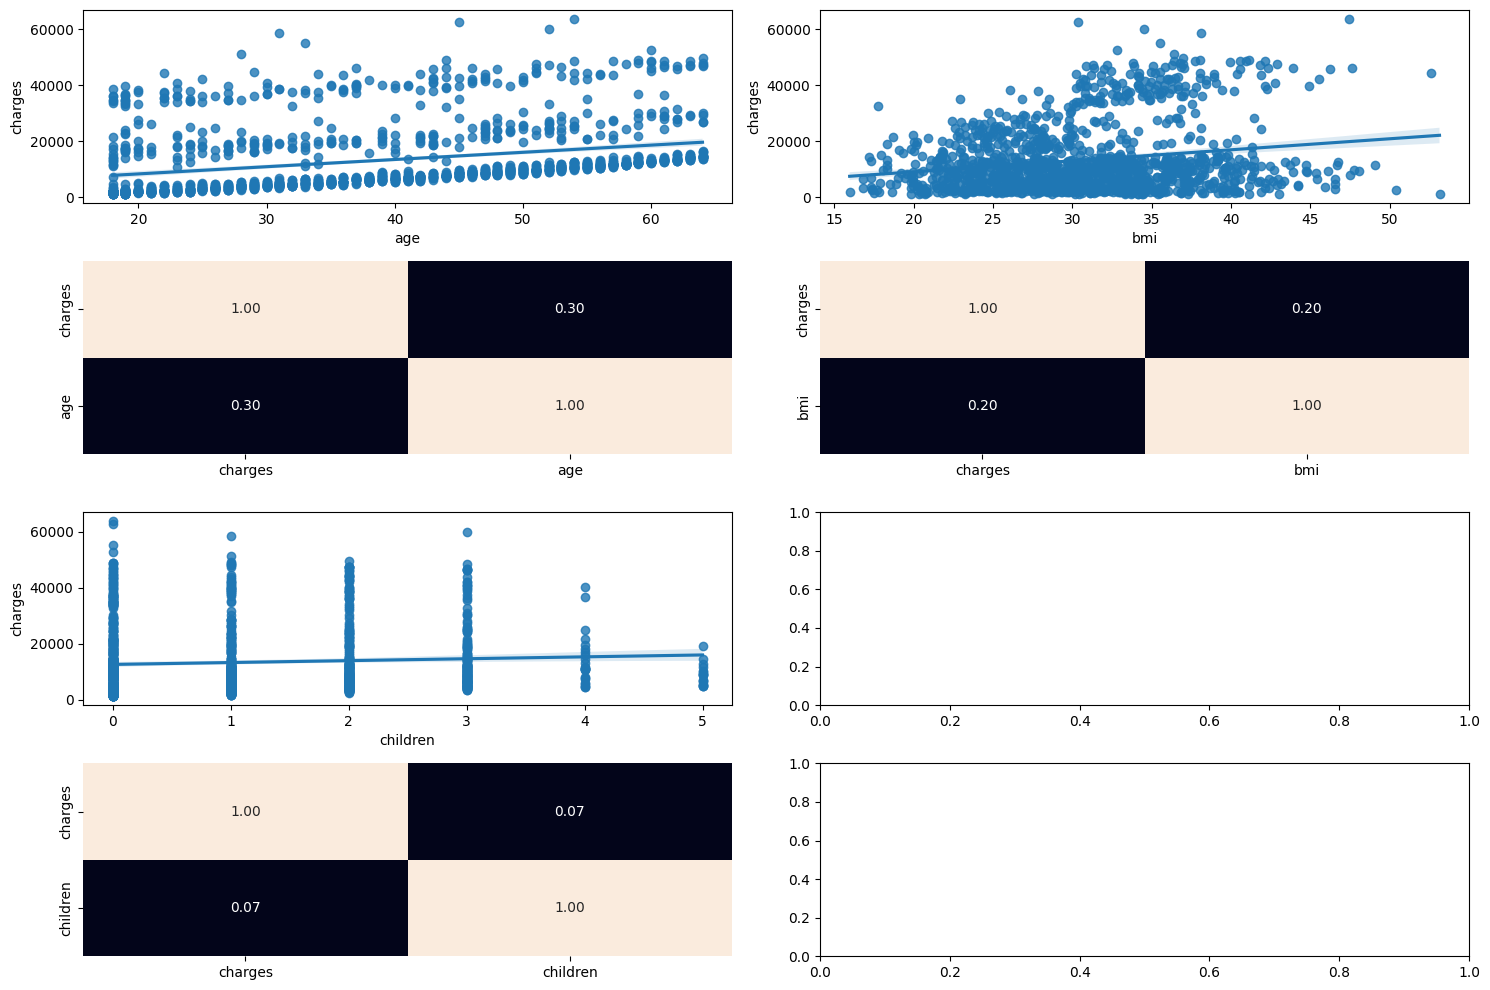

In [7]:
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

sns.regplot(ax = axis[0, 0], data = data, x =  'age', y = 'charges')
sns.heatmap(data[['charges', 'age']].corr(), annot = True, fmt='.2f', ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x =  'bmi', y = 'charges')
sns.heatmap(data[['charges', 'bmi']].corr(), annot = True, fmt='.2f', ax = axis[1, 1], cbar = False)

sns.regplot(ax = axis[2, 0], data = data, x =  'children', y = 'charges')
sns.heatmap(data[['charges', 'children']].corr(), annot = True, fmt='.2f', ax = axis[3, 0], cbar = False)

plt.tight_layout()

plt.show()

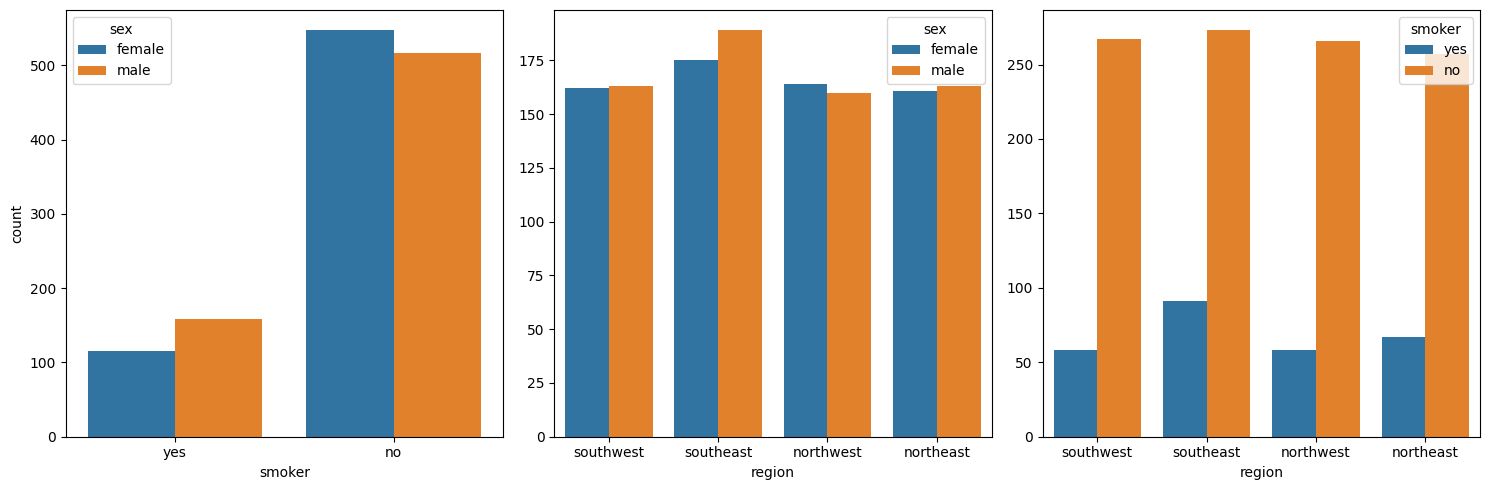

In [8]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.countplot(ax = axis[0], data = data, x = "smoker", hue = "sex")
sns.countplot(ax = axis[2], data = data, x = "region", hue = "smoker").set(ylabel = None)
sns.countplot(ax = axis[1], data = data, x = "region", hue = "sex").set(ylabel = None)
#sns.countplot(ax = axis[1, 0], data = data, x = "SibSp", hue = "Survived")
#sns.countplot(ax = axis[1, 1], data = data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()


plt.show()

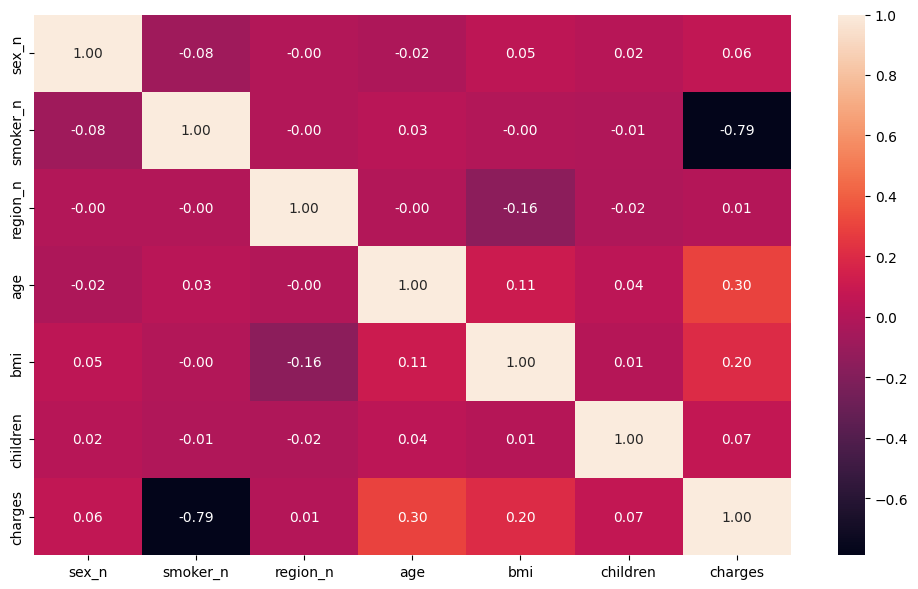

In [9]:
data['sex_n'] = pd.factorize(data['sex'])[0]
data['smoker_n'] = pd.factorize(data['smoker'])[0]
data['region_n'] = pd.factorize(data['region'])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(data[["sex_n", "smoker_n", "region_n", "age", "bmi", "children", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()


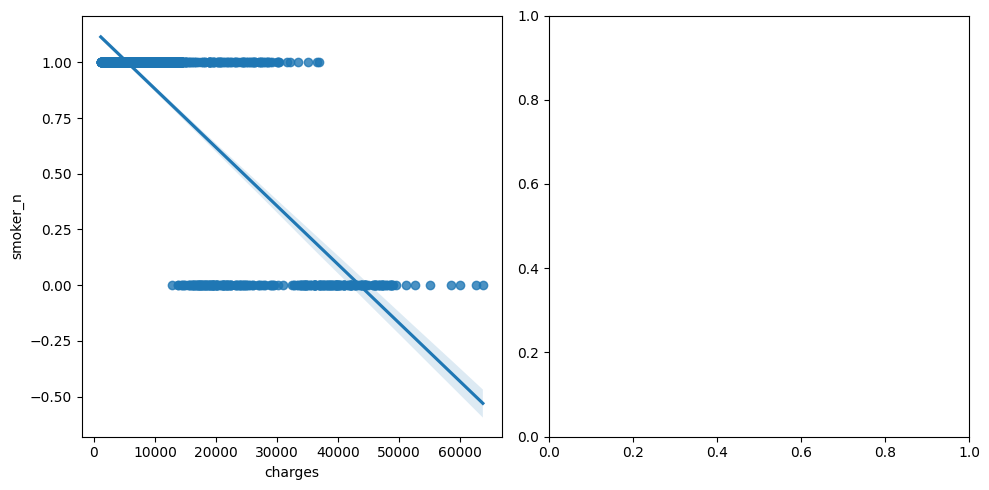

In [10]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.regplot(ax = axis[0], data = data, x = "charges", y = "smoker_n")


plt.tight_layout()

plt.show()

In [11]:
data.describe()

,age,bmi,children,charges,sex_n,smoker_n,region_n
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487,0.504862,0.795064,1.483919
std,14.044333,6.100468,1.205571,12110.359656,0.500163,0.403806,1.105208
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.290000,0.000000,4746.344000,0.000000,1.000000,1.000000
50%,39.000000,30.400000,1.000000,9386.161300,1.000000,1.000000,1.000000
75%,51.000000,34.700000,2.000000,16657.717450,1.000000,1.000000,2.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,3.000000


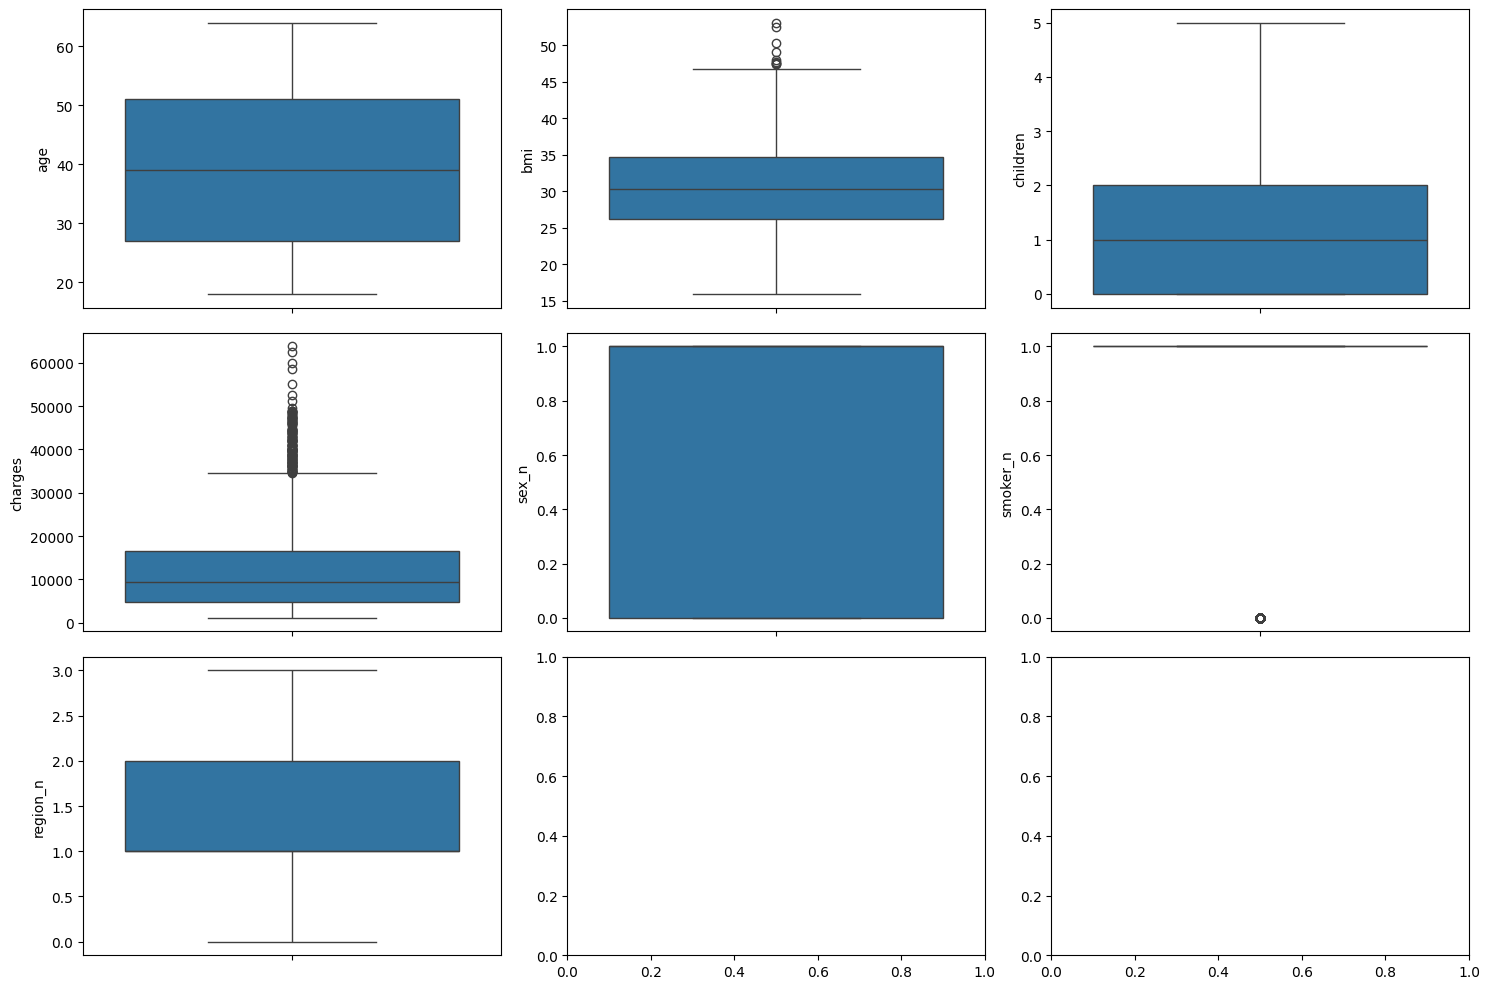

In [12]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "age")
sns.boxplot(ax = axis[0, 1], data = data, y = "bmi")
sns.boxplot(ax = axis[0, 2], data = data, y = "children")
sns.boxplot(ax = axis[1, 0], data = data, y = "charges")
sns.boxplot(ax = axis[1, 1], data = data, y = "sex_n")
sns.boxplot(ax = axis[1, 2], data = data, y = "smoker_n")
sns.boxplot(ax = axis[2, 0], data = data, y = "region_n")


plt.tight_layout()

plt.show()

In [13]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "bmi", "children", "region_n", "sex_n", "smoker_n"]

X = data.drop("charges", axis = 1)[num_variables]
y = data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scal = pd.DataFrame(scaler.fit_transform(X_train[num_variables]), columns=num_variables)
X_test_scal = pd.DataFrame(scaler.transform(X_test[num_variables]), columns=num_variables)



In [42]:

from sklearn.feature_selection import SelectKBest, f_regression

selection_model = SelectKBest(score_func=f_regression, k=4)

selection_model.fit(X_train_scal, y_train)

ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train_scal), columns=X_train.columns[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test_scal), columns=X_train.columns[ix])

X_train_sel



,age,bmi,children,smoker_n
0,0.108696,0.230024,0.0,1.0
1,0.065217,0.263250,0.4,1.0
2,0.739130,0.580172,0.4,1.0
3,0.978261,0.686306,0.0,1.0
4,0.630435,0.286252,0.4,1.0
...,...,...,...,...
1064,0.717391,0.511165,0.4,0.0
1065,0.195652,0.805488,0.4,1.0
1066,0.043478,0.162497,0.2,1.0
1067,0.434783,0.323917,0.6,1.0


In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sel, y_train)


LinearRegression()

In [44]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 21143.269121973935
Coeficientes (b): [ 11462.79943201  11346.78939471   2689.8609795  -23042.50723793]


In [45]:
y_pred = model.predict(X_test_sel)
y_pred

array([ 7826.71976716,  5936.53265111, 14173.07782788, 31622.75075546,
        9263.34093635, 13480.14887712, 29787.25790395,  1643.45719872,
       10876.17888434, 11325.66257258, 10382.00922092, 33095.82145191,
       30563.99442887, 17375.68543919, 10170.05222026,  9793.97788271,
        4338.87322262, 32040.02942064,  3533.00631632,  5540.63300408,
        3800.90102672, 29849.73579925, 15058.38135413, 30681.25821127,
       30855.22159196,  5318.35517484, 35651.38184556, 36750.00646392,
       10887.72705446, 13731.47292098,  5951.31281261, 13057.0503156 ,
         885.50217102, 12378.3628904 , 39714.81547966, 12430.12415904,
        4898.39413804,  3922.99091642, 31372.98531615,  9306.77316642,
        6376.62829275, 29696.01315781, 35095.36875728, 11850.11609205,
        7372.07939253,  3596.50605624,  5524.8651415 ,  9123.94398722,
        4175.68935164,  9410.0034801 ,  6870.37575452, 11482.89235724,
       30753.06314612,  3901.63926993, 11213.80257282, 10152.26872403,
      

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 35914551.480433635
R2 Score: 0.8045531086669288
